# K-means clustering

In [78]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

In [79]:
# 构建五个圆心，并且进行发散
blob_centers = np.array([
    [0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]
])

blob_std = np.array([0.4, 0.3, 0.1, 1.0, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

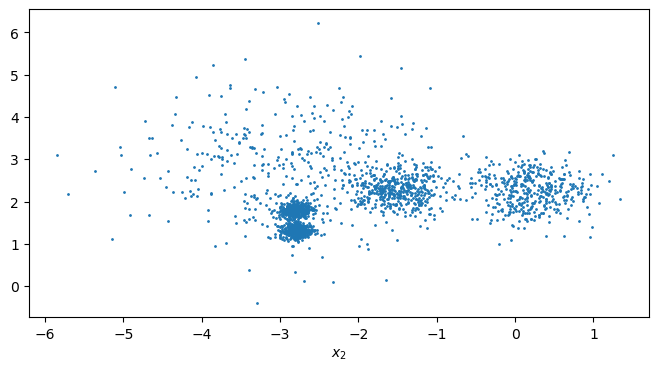

In [80]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.xlabel("$x_2$")


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

# 决策边界

In [81]:
from sklearn.cluster import KMeans

K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
y_pre = kmeans.fit_predict(X)

/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [82]:
# 得到预测值
y_pre

array([2, 2, 1, ..., 2, 1, 2], dtype=int32)

In [83]:
# 得到中心点
kmeans.cluster_centers_

array([[-1.51100933,  2.30435099],
       [ 0.20370816,  2.25549285],
       [-2.81175102,  1.56568937],
       [-2.43266464,  3.68396658],
       [-3.93391592,  3.04862   ]])

In [84]:
# 预测新数据
X_new = np.array([
    [0, 2],
    [3, 2],
    [-3, 3],
    [-3, 2.5]
])
kmeans.predict(X_new)

array([1, 1, 3, 2], dtype=int32)

In [85]:
# 得到决策边界
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 画出圆心
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=30, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=5, linewidths=10, color=cross_color, zorder=11, alpha=1)

# 画出决策边界
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
        
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

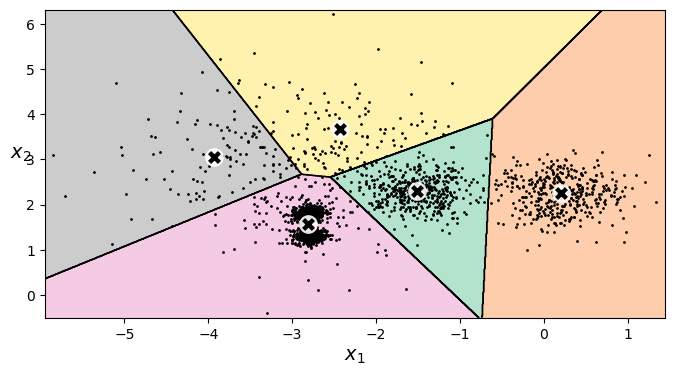

In [86]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

# 算法流程

In [87]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, algorithm='full', max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

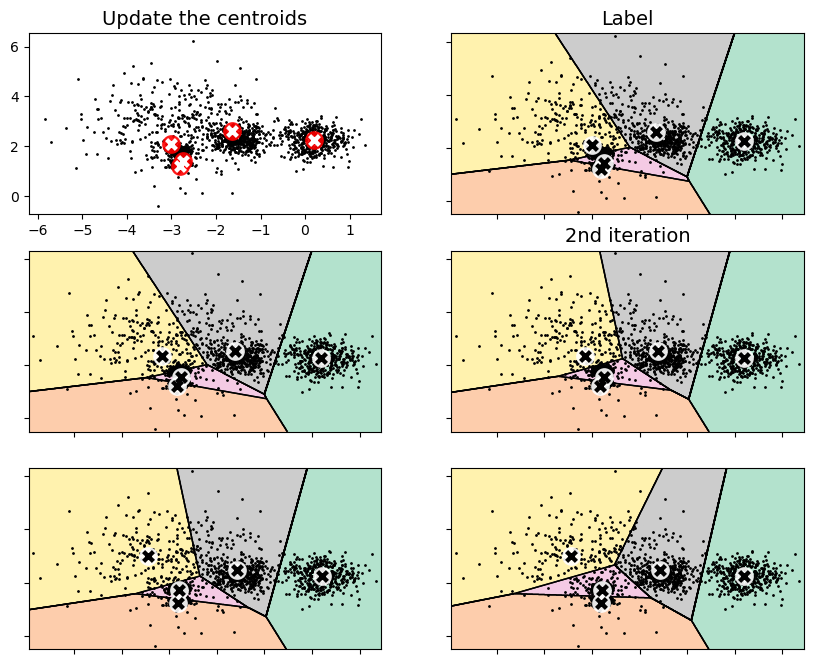

In [88]:
plt.figure(figsize=(10, 8))
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.title('Update the centroids', fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title('Label', fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)
plt.title('2nd iteration', fontsize=14)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False, show_xlabels=False, show_ylabels=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_xlabels=False, show_ylabels=False)